In [1]:
!pip install shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.7 MB/s eta 0:00:00


In [2]:
import shap
import xgboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
data=load_breast_cancer()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,random_state=0,test_size=0.2)

In [6]:
from xgboost import XGBClassifier

In [7]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
explainer=shap.Explainer(model,X_train)

In [9]:
shap_values=explainer(X_test)

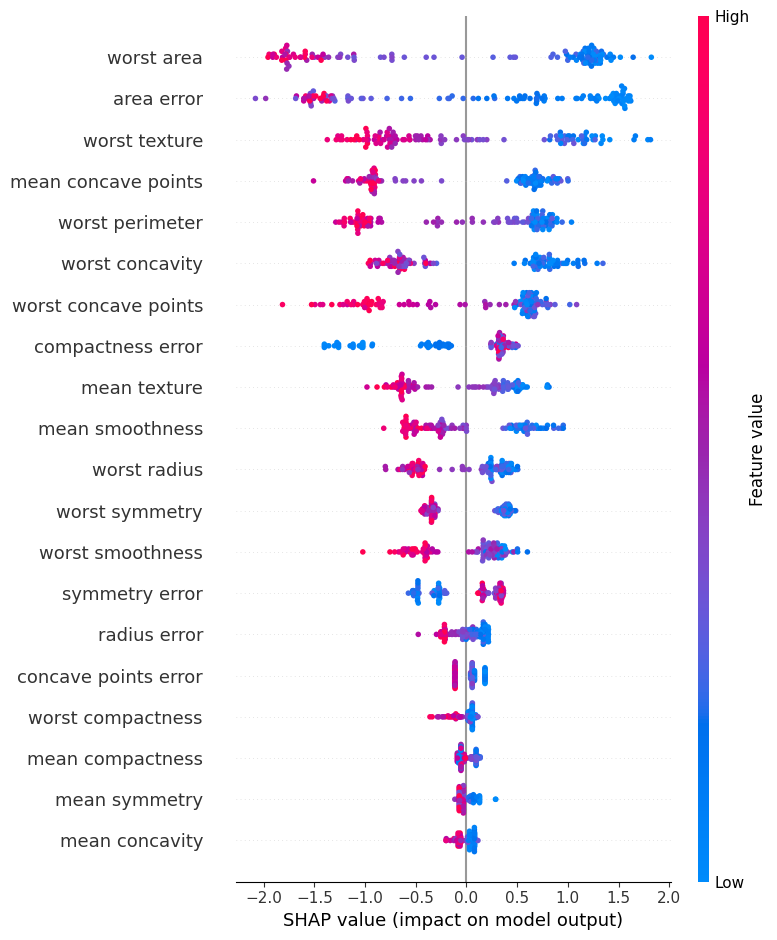

In [10]:
shap.summary_plot(shap_values,X_test,feature_names=data.feature_names)